In [22]:
# Import necessary libraries

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy import interpolate

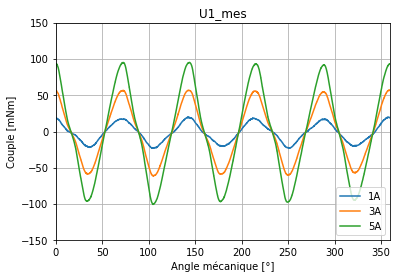

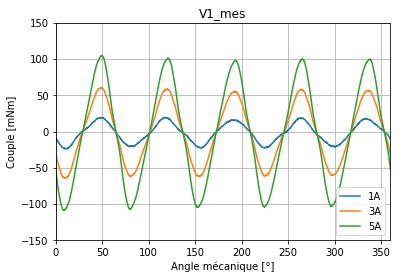

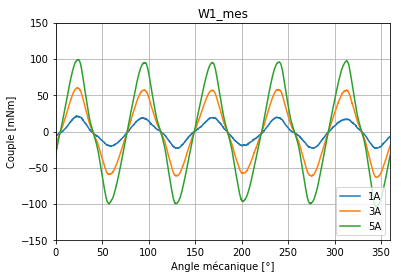

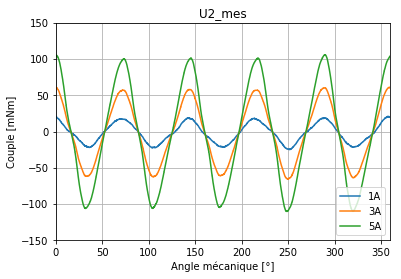

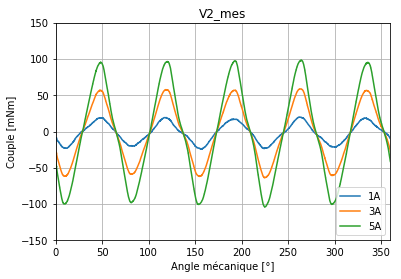

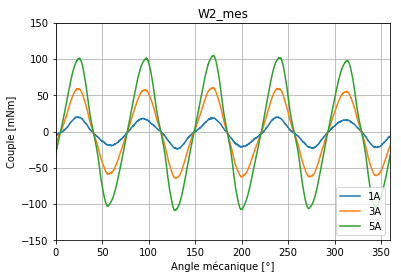

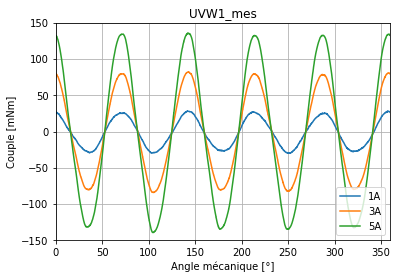

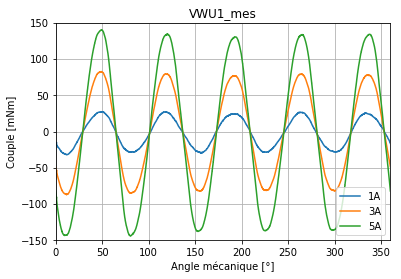

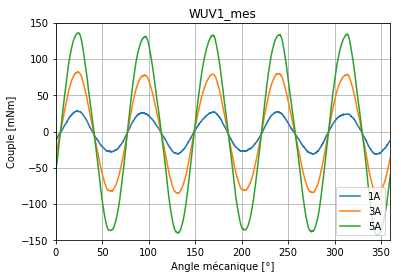

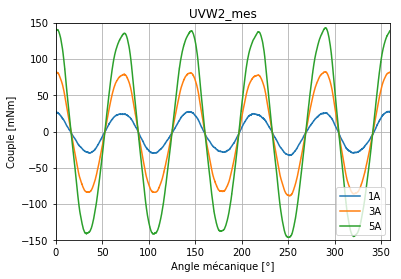

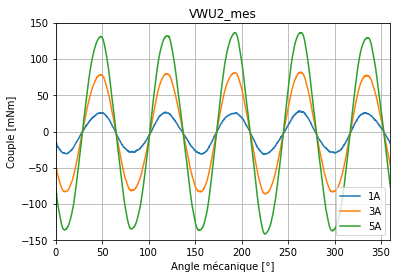

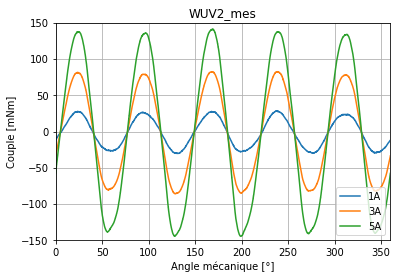

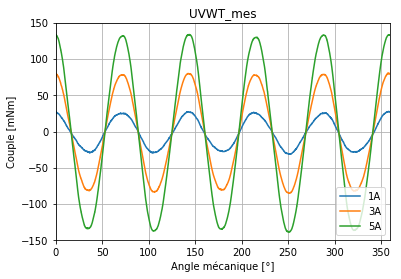

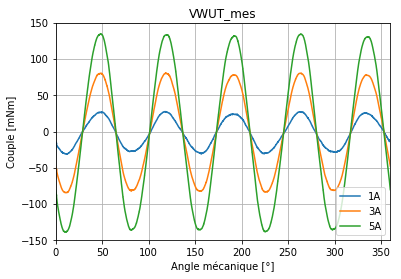

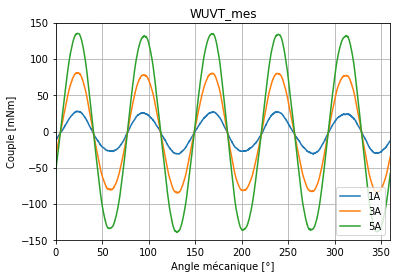

In [65]:
### Import data set
I_mes = [1,3,5] # Input current
Nsp = 98 # Number of spires
g1c_fem = 2.006E-4
KT_fem = 32.8E-3
#AJOUTER R0 mesuré pour KM

# To Read
C0 = ["C0_aller", "C0_retour"]
phase_single = ["U1","V1","W1","U2","V2","W2"]
phase_etoile = ["UVW1","VWU1","WUV1","UVW2","VWU2","WUV2","UVWT","VWUT","WUVT"]
phase = phase_single + phase_etoile

to_read = C0+phase

angle_step = 0.0141 # angular step
angle_vec = np.arange(0,360,angle_step)

Var_dict_mes = {} #Dictionnary containing mesured variables
for i, read_elem in enumerate(to_read):
    Couple_current = [] # Will contain for each phase, the torque for each current
    for j, I_mes_elem in enumerate(I_mes):
        
        if (read_elem in C0):
            if (j==0):
                df_raw = pd.read_csv("Mesures_couple/%s"%(read_elem), header = None,delimiter="\t")
            else: continue
        else:
            df_raw = pd.read_csv("Mesures_couple/%s_%iA"%(read_elem,I_mes_elem), header = None,delimiter="\t")
        
        df_raw.drop_duplicates(0,inplace=True)
        df_raw = np.array(df_raw.sort_values(by = 0))

        intp_couple = interpolate.interp1d(df_raw[:,0], df_raw[:,1], fill_value = "extrapolate")
        shift_angle = 1 # shift angle for the plot
        Couple_intp  = np.roll(intp_couple(angle_vec),int(shift_angle/angle_step))
        Couple_current.append(Couple_intp) # Store torque values
        
        if (read_elem in C0): # plot C0 later, just store value
            Var_dict_mes[read_elem] = Couple_intp # Add torque values to each phase variable
        else: # plot and store 
            plt.plot(angle_vec,Couple_intp*1000,label = "%iA"%I_mes_elem)
            Var_dict_mes[read_elem+"_mes"] = Couple_current # Add torque values to each phase variable
    
    
    if not (read_elem in C0):
        plt.xlabel("Angle mécanique [°]")
        plt.ylabel("Couple [mNm]")
        plt.xlim([0,360])
        plt.ylim([-150,150])
    
        plt.title("%s"%(read_elem+"_mes"))
        plt.legend(loc="lower right")
        plt.grid()
        plt.show()
    
locals().update(Var_dict_mes) # Create all variables in the dictionnary

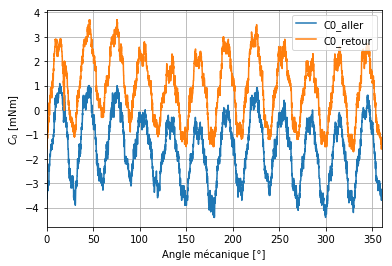

C_frot: 	1.251[mNm]
C0_aller: 	2.450[mNm]
C0_retour: 	2.350[mNm]
C0: 		2.361[mNm]


In [61]:
# plot C0
for C0_elem in C0:
    plt.plot(angle_vec,eval(C0_elem)*1000,"-",label = C0_elem)
    
plt.xlabel("Angle mécanique [°]")
plt.ylabel("$C_0$ [mNm]")
plt.xlim([0,360])
plt.legend(loc="best")
plt.grid()
plt.show()

C_frot = np.average(eval(C0[1])-eval(C0[0]))/2

n_peak = 12
periode_elem = int(360/(n_peak*angle_step))
C_C0_aller_temp = []
C_C0_retour_temp = []
C_C0_temp = []
for i in range(0,n_peak):
    C_C0_aller_temp.append((max(eval(C0[0])[i*periode_elem:(i+1)*periode_elem])-min(eval(C0[0])[i*periode_elem:(i+1)*periode_elem]))/2)
    C_C0_retour_temp.append((max(eval(C0[1])[i*periode_elem:(i+1)*periode_elem])-min(eval(C0[1])[i*periode_elem:(i+1)*periode_elem]))/2)
    C_C0_temp.append(np.average([C_C0_aller_temp, C_C0_retour_temp])) 
    
C_C0_aller = max(C_C0_aller_temp)
C_C0_retour = max(C_C0_retour_temp)
C_C0 = max(C_C0_temp)

print("C_frot: \t%.3f[mNm]"%(C_frot*1000))

print("C0_aller: \t%.3f[mNm]"%(C_C0_aller*1000))
print("C0_retour: \t%.3f[mNm]"%(C_C0_retour*1000))
print("C0: \t\t%.3f[mNm]"%(C_C0*1000))

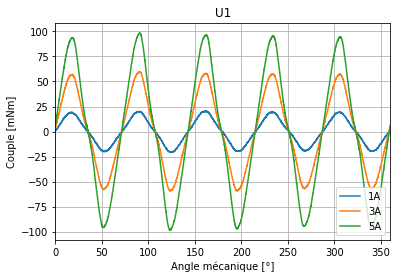

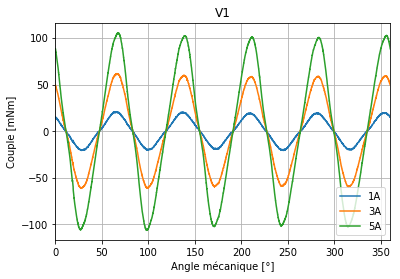

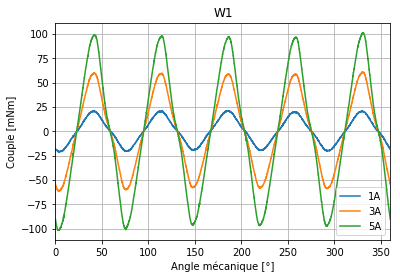

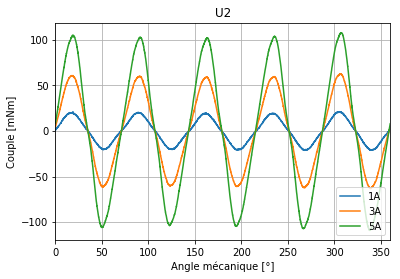

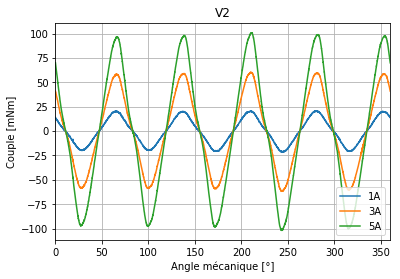

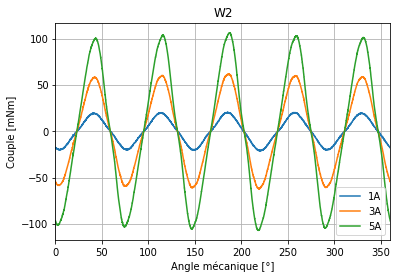

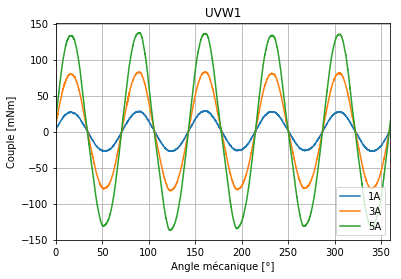

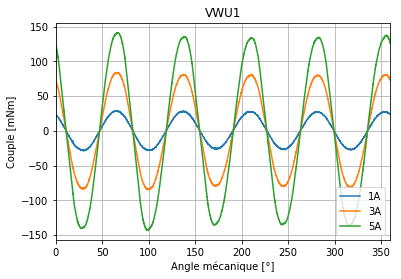

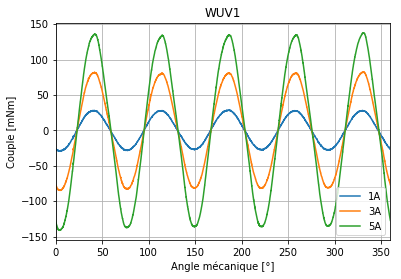

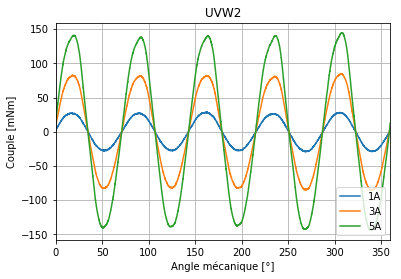

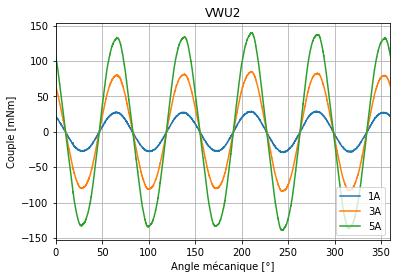

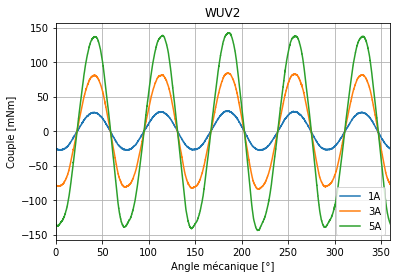

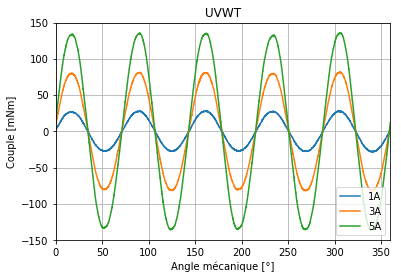

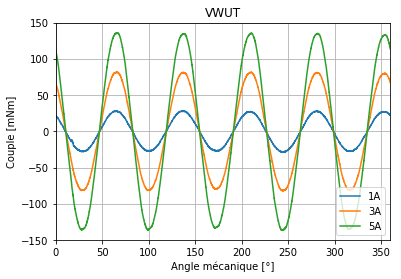

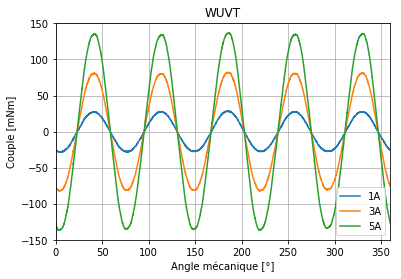

In [62]:
#plot torques without C0
Var_dict = {} #Dictionnary containing adjusted variables (-C0)
for i, read_elem in enumerate(phase):
    torque_adjusted = []
    for j, I_mes_elem in enumerate(I_mes):
        torque_adjusted.append(eval(read_elem+"_mes")[j]-C0_aller)
        plt.plot(angle_vec,torque_adjusted[j]*1000,label = "%iA"%I_mes_elem)

        
    Var_dict[read_elem] = torque_adjusted
    plt.xlabel("Angle mécanique [°]")
    plt.ylabel("Couple [mNm]")
    plt.xlim([0,360])
    #plt.ylim([-150,150])
    plt.title("%s"%(read_elem))
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
    
locals().update(Var_dict) # Create all variables in the dictionnary

U1
g1c_period :  [0.000201 0.000199 0.000198]
g1c_period :  [0.000208 0.000198 0.000199]
g1c_period :  [0.000199 0.000198 0.000196]
g1c_period :  [0.000196 0.000194 0.000193]
g1c_period :  [0.000196 0.000192 0.000192]
g1c_phase :  [0.000199 0.000202 0.000198 0.000194 0.000194]
V1
g1c_period :  [0.000207 0.000208 0.000216]
g1c_period :  [0.000205 0.000205 0.000214]
g1c_period :  [0.000193 0.000201 0.000208]
g1c_period :  [0.000199 0.0002   0.000207]
g1c_period :  [0.000197 0.000202 0.00021 ]
g1c_phase :  [0.00021  0.000208 0.000201 0.000202 0.000203]
W1
g1c_period :  [0.000208 0.000204 0.000204]
g1c_period :  [0.000204 0.0002   0.000198]
g1c_period :  [0.000205 0.000198 0.000198]
g1c_period :  [0.000203 0.000199 0.000198]
g1c_period :  [0.000211 0.000207 0.000207]
g1c_phase :  [0.000206 0.0002   0.0002   0.0002   0.000208]
U2
g1c_period :  [0.000204 0.000206 0.000213]
g1c_period :  [0.000197 0.000202 0.00021 ]
g1c_period :  [0.000201 0.000204 0.000213]
g1c_period :  [0.00021  0.000211 0

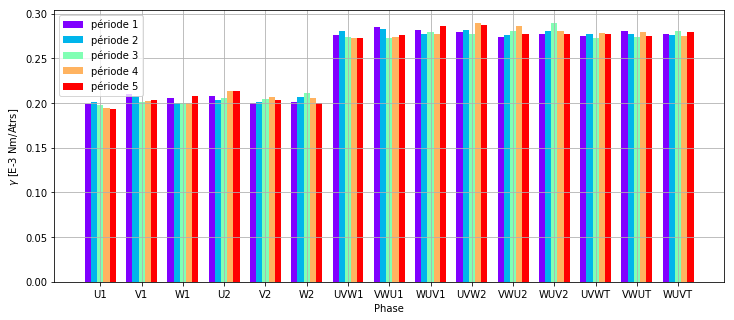

In [67]:
# gamma 1 coil
Npp = 5
periode_elem = int(360/(Npp*angle_step))

plt.figure(figsize=(12,5))
colors = cm.rainbow(np.linspace(0, 1, Npp)) # Switch color for every peak, repeat for each phase

df_g1c = pd.DataFrame(columns = phase, index = ["average", "max", "min"])# Gamma1coil info
for i, read_elem in enumerate(phase):
    print(read_elem)
    zero_index = np.argmax(abs(eval(read_elem)[len(I_mes)-1])<1E-3) # Give an index where torque is approx 0
    gamma1coil_phase = []
    for j in range(0,Npp): # for each period
        gamma1coil_period = []
        for k, I_mes_elem in enumerate(I_mes):
            # start looking for the index for min and max torque on a period for a given current, period starting at approx C=0
            double_list = list(eval(read_elem)[2])*2 # double length of list so it can search on period ending after 360°
            max_torque_index  = zero_index+j*periode_elem+np.argmax(double_list[(zero_index+j*periode_elem):(zero_index+(j+1)*periode_elem)])
            min_torque_index  = zero_index+j*periode_elem+np.argmin(double_list[(zero_index+j*periode_elem):(zero_index+(j+1)*periode_elem)])

            max_torque_index = max_torque_index%(np.shape(eval(read_elem))[1]-1)
            min_torque_index = min_torque_index%(np.shape(eval(read_elem))[1]-1)

            gamma1coil_period.append((eval(read_elem)[k][max_torque_index]-eval(read_elem)[k][min_torque_index])/(2*Nsp*I_mes_elem))

        print("g1c_period : ",np.round(gamma1coil_period,6))    
        
        gamma1coil_phase.append(np.average(gamma1coil_period))
        
        # just add label for first phase, because they're all similar
        if (i==0): lab = "période "+str(j+1)
        else: lab = None

        w = 0.15
        plt.bar(i+(j-2)*w,gamma1coil_phase[j]*1000,width=w,color=colors[j],align='center',label = lab)    
        
    print("g1c_phase : ",np.round(gamma1coil_phase,6)) 
    df_g1c[read_elem] = [np.average(gamma1coil_phase), max(gamma1coil_phase), min(gamma1coil_phase)]

plt.xlabel("Phase")
plt.ylabel("$\gamma$ [E-3 Nm/Atrs]")
plt.xticks(range(0,len(phase)),phase)
plt.legend()
plt.grid()
plt.show()

In [68]:
print(df_g1c)

g1c_av = np.average(df_g1c.loc["average",phase_single])
g_star1_av = np.average(df_g1c.loc["average",phase_etoile[0:3]])
g_star2_av = np.average(df_g1c.loc["average",phase_etoile[3:7]])
g_star_av = np.average(df_g1c.loc["average",phase_etoile[-3:]])

KT = g_star_av*Nsp

fac_1c_m = 3/2
print("g1c_single_average\t: %.6f\terreur relative: %.1f%%"%(g1c_av, (g1c_av.round(6)-g1c_fem)/g1c_fem*100))
print("g_star1_average\t\t: %.6f\terreur relative: %.1f%%"%(g_star1_av, (g_star1_av.round(6)-fac_1c_m*g1c_fem)/(fac_1c_m*g1c_fem)*100))
print("g_star2_average\t\t: %.6f\terreur relative: %.1f%%"%(g_star2_av, (g_star2_av.round(6)-fac_1c_m*g1c_fem)/(fac_1c_m*g1c_fem)*100))
print("g_star_average\t\t: %.6f\terreur relative: %.1f%%"%(g_star_av, (g_star_av.round(6)-fac_1c_m*g1c_fem)/(fac_1c_m*g1c_fem)*100))

print("KT_double_etoile\t: %.5f\terreur relative: %.1f%%"%(KT, (KT-KT_fem)/KT_fem*100))

               U1        V1        W1        U2        V2        W2      UVW1  \
average  0.000197  0.000205  0.000203  0.000209  0.000203  0.000205  0.000276   
max      0.000202  0.000210  0.000208  0.000214  0.000207  0.000211  0.000281   
min      0.000194  0.000201  0.000200  0.000203  0.000200  0.000200  0.000272   

             VWU1      WUV1      UVW2      VWU2      WUV2      UVWT      VWUT  \
average  0.000278  0.000280  0.000283  0.000279  0.000281  0.000276  0.000277   
max      0.000285  0.000286  0.000290  0.000287  0.000290  0.000279  0.000281   
min      0.000273  0.000278  0.000277  0.000274  0.000277  0.000273  0.000274   

             WUVT  
average  0.000278  
max      0.000281  
min      0.000275  
g1c_single_average	: 0.000204	erreur relative: 1.7%
g_star1_average		: 0.000278	erreur relative: -7.6%
g_star2_average		: 0.000280	erreur relative: -6.9%
g_star_average		: 0.000277	erreur relative: -7.9%
KT_double_etoile	: 0.02716	erreur relative: -17.2%
